In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from utils import SIR_net, SIR_net_adaptive
import utils

Testing the effect of rewiring in the information network

In [78]:
N = 1000 # number of nodes
ave_degree = 15
p = ave_degree / N  # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=100, replace=False)
#initial_no_vax = np.arange(100,400)
initial_no_vax = 300


mu = 0.1       # recovery rate
beta = 0.15    # infection rate
gamma = 0.01
pro = 0.005      # rate of classical media influence on people
pol = 0.01      # propensity of opinion polarization
p_sym = 0.     # prob for an infected person to have severe symptoms
r = 0.3        # rate of vaccination for PV

G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
G_info_static = G_phys.copy()
utils.initNET_SI(G_info_static, I0=initial_no_vax, I_seed=np.arange(10)) # initialize information network
#utils.initNET_rnd(G_info_static, initial_no_vax)
G_info_dynamic = G_info_static.copy()


sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta,gamma=gamma, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds, rewiring = False)
print("s")
sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta,gamma=gamma, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)

simulation until time t=100


(0.0, 300.0)

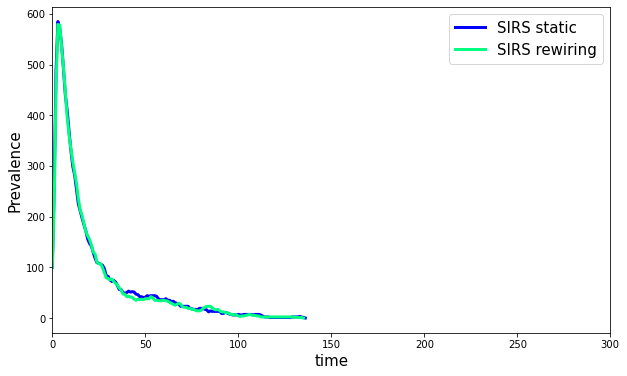

In [75]:
colors = cm.get_cmap('winter', 2)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.plot(sim_static[0], sim_static[2], lw=3, c=colors(0), label= "SIRS static", alpha=1)
ax.plot(sim_dynamic[0], sim_dynamic[2], lw=3, c=colors(1), label= "SIRS rewiring", alpha=1)
ax.legend(fontsize=15)
ax.set_ylabel("Prevalence", size=15)
ax.set_xlabel("time", size=15)
ax.set_xlim(0, 300)

infoNET clustering coefficients:
static: 0.04503386491928099
dynamic: 0.04310963723246377


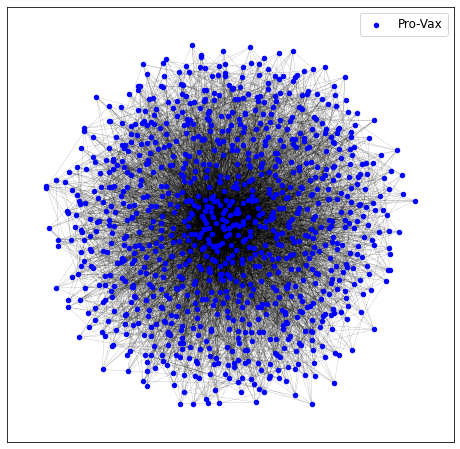

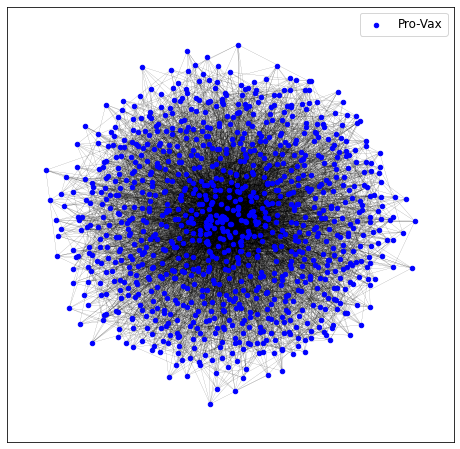

In [79]:
print('infoNET clustering coefficients:')
print('static:', nx.algorithms.cluster.average_clustering(G_info_static))
print('dynamic:', nx.algorithms.cluster.average_clustering(G_info_dynamic))
utils.plot_info_network(G_info_static)
utils.plot_info_network(G_info_dynamic)

In [ ]:
vac = 0
rec = 0
for i in G_phys.nodes():
    if G_phys.nodes[i]['inf_status'] == 'V':
        vac += 1
    elif G_phys.nodes[i]['inf_status'] == 'R':
        rec += 1    
print('vaccinated', vac)
print('recovered', rec)

Testing if with a faster dynamics we can appreciate differences among curves with this second scheme

In [ ]:
N = 1000 # number of nodes
ave_degree = 15
p = ave_degree / N  # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=100, replace=False)

mu = 0.02       # recovery rate
beta = 0.03    # infection rate
gamma = 0.01
pro = 0.0005       # rate of classical media influence on people
pol = 0.5       # propensity of opinion polarization
p_sym = 0.05    # prob for an infected person to have severe symptoms
r = 0.1         # rate of vaccination for PV


G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
G_info_0 = G_phys.copy()
G_info_50 = G_phys.copy()
G_info_100 = G_phys.copy()
G_info_300 = G_phys.copy()
utils.initNET_SI(G_info_0, I0=0, I_seed=[])
utils.initNET_SI(G_info_50, I0=50, I_seed=np.arange(10))
utils.initNET_SI(G_info_100, I0=100, I_seed=np.arange(10))
utils.initNET_SI(G_info_300, I0=300, I_seed=np.arange(10))

sim1 = SIR_net(G_phys, beta=beta, mu=mu, initial_infecteds=initial_infecteds)
sim2 = SIR_net_adaptive(G_phys, G_info_0, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)
sim3 = SIR_net_adaptive(G_phys, G_info_50, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)
sim4 = SIR_net_adaptive(G_phys, G_info_100, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)
sim5 = SIR_net_adaptive(G_phys, G_info_300, beta=beta, mu=mu, r=r, pro=pro, pol=pol, p_sym=p_sym, initial_infecteds=initial_infecteds)

In [ ]:
colors = cm.get_cmap('winter', 5)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.plot(sim2[0], sim2[2], lw=3, c=colors(0), label= "0 No-Vax", alpha=1)
ax.plot(sim3[0], sim3[2], lw=3, c=colors(1), label= "50 No-Vax", alpha=1)
ax.plot(sim4[0], sim4[2], lw=3, c=colors(2), label= "100 No-Vax", alpha=1)
ax.plot(sim5[0], sim5[2], lw=3, c=colors(3), label= "300 No-Vax", alpha=1)
ax.plot(sim1[0], sim1[2], lw=3, c=colors(4), label= "SIR", alpha=1)
ax.legend(fontsize=15)
ax.set_ylabel("Prevalence", size=15)
ax.set_xlabel("time", size=15)
ax.set_xlim(0,400)

In [ ]:
print('total infected with 0 novax:', sim2[4])
print('total infected with 50 novax:', sim3[4])
print('total infected with 100 novax:', sim4[4])
print('total infected with 300 novax:', sim5[4])

In [ ]:
print('infoNET clustering coefficients:')
print('dynamic:', nx.algorithms.cluster.average_clustering(G_info_300))
utils.plot_info_network(G_info_300)

Simulations with different polarizations and vaccination rate

In [77]:
N = 1000                       # number of nodes
ave_degree = 15
p = ave_degree / N             # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=100, replace=False)

mu = 0.1                      # recovery rate
beta = 0.15                    # infection rate
gamma = 0.01
pro = 0.001                  # rate of classical media influence on people
pol = [i*0.1 for i in range(9) ]      # propensity of opinion polarization
p_sym = 0.005                   # prob for an infected person to have severe symptoms
r = np.arange(1,10)/10         # rate of vaccination for PV

n = len(pol)
p = len(r)
networks = []
inf = []

for i in range(n):
    for j in range(p):
        media = []
        for l in range(10):
            G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
            G_info_300 = G_phys.copy()
            utils.initNET_SI(G_info_300, I0=300, I_seed=np.arange(10))
            sim = SIR_net_adaptive(G_phys, G_info_300, beta=beta, mu=mu, gamma = gamma, r=r[j], pro=pro, pol=pol[i], p_sym=p_sym, initial_infecteds=initial_infecteds)
            media.append(sim[0][-1])
        mean = np.mean(media)
        inf.append(mean)
    print("s")
    


simulation until time t=583
simulation until time t=583
simulation until time t=765
simulation until time t=853
simulation until time t=987
simulation until time t=100
simulation until time t=684
simulation until time t=811
simulation until time t=275


In [79]:
infected = np.array(inf).reshape((p,n))

In [ ]:
for i in range(n):
    utils.plot_info_network(networks[0+9*i])

In [80]:
maxi = np.zeros((p,n))
for i in range(n):
    for j in range(n):
        a = infected[-i-1][j]
        maxi[i][j] = a
    
#plt.plot(pol,maxi[5])

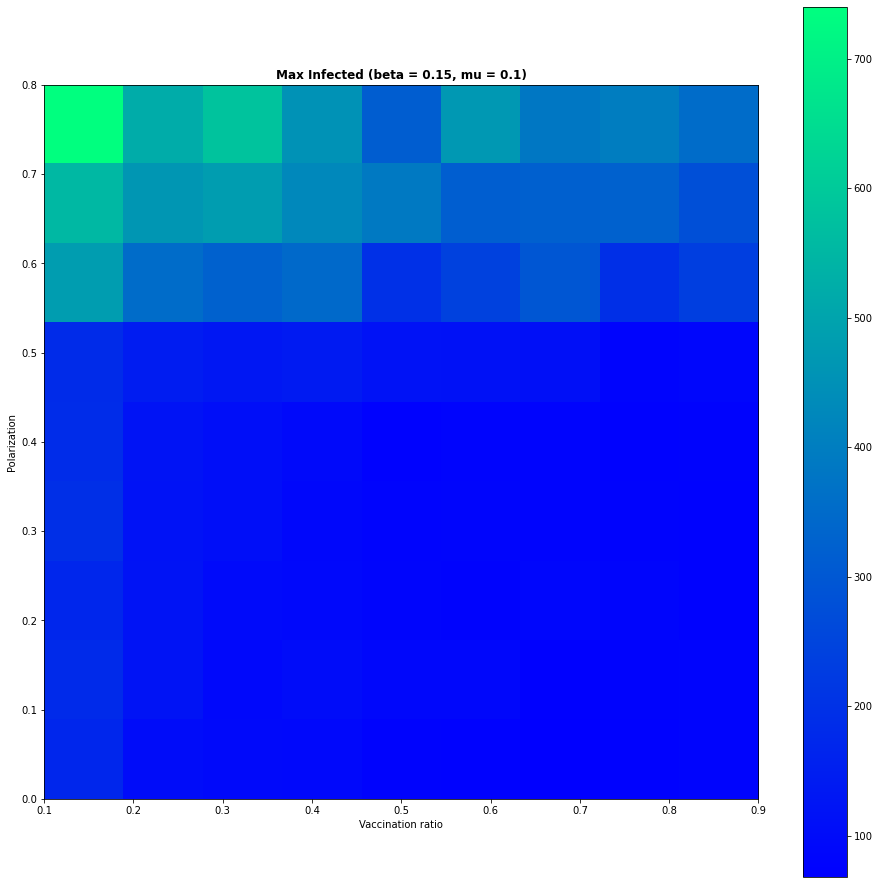

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

a = plt.imshow( maxi , cmap = 'winter' , interpolation = 'nearest', extent = [min(r), max(r),min(pol), max(pol)] )
plt.colorbar(a)
plt.title('Max Infected (beta = 0.15, mu = 0.1)', fontweight ="bold")
plt.xlabel("Vaccination ratio")
plt.ylabel("Polarization")
plt.show()

A greater vaccination rate

In [ ]:
N = 1000 # number of nodes
ave_degree = 15
p = ave_degree / N  # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=100, replace=False)

mu = 0.02       # recovery rate
beta = 0.03    # infection rate
pro = 0.0005    # rate of classical media influence on people
pol = np.arange(1,20)/20       # propensity of opinion polarization
p_sym = 0.05    # prob for an infected person to have severe symptoms
r = 0.4         # rate of vaccination for PV

networks = []
inf = []

for i in range(len(pol)):
    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_300 = G_phys.copy()
    utils.initNET_SI(G_info_300, I0=300, I_seed=np.arange(10))
    sim = SIR_net_adaptive(G_phys, G_info_300, beta=beta, mu=mu, r=r, pro=pro, pol=pol[i], p_sym=p_sym, initial_infecteds=initial_infecteds)
    networks.append(G_info_300)
    inf.append(sim[2])

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(4*4, 3*3))
for i in range(len(pol)):
    utils.plot_info_network(networks[i])
    ax[i//5,i%4].plot(np.arange(len(inf[i])), inf[i], lw=3, c=colors(0), label= "0 No-Vax", alpha=0.6)

In [ ]:
maxi = []
for i in inf:
    a = max(i)
    maxi.append(a)
    
plt.plot(pol,maxi)

In [62]:
infected[7]

array([[1.19e+02, 1.00e-01, 1.00e-01],
       [1.09e+02, 1.00e-01, 2.00e-01],
       [1.14e+02, 1.00e-01, 3.00e-01],
       [9.20e+01, 1.00e-01, 4.00e-01],
       [8.50e+01, 1.00e-01, 5.00e-01],
       [1.13e+02, 1.00e-01, 6.00e-01],
       [8.80e+01, 1.00e-01, 7.00e-01],
       [7.10e+01, 1.00e-01, 8.00e-01],
       [7.00e+01, 1.00e-01, 9.00e-01]])